In [ ]:
#Ha aahe

import cv2
import os
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib import pyplot as plt
import shutil
# Define the path to your video file
video_path = 'defense_0002.avi'

# Create a directory to store the extracted frames
output_dir = 'frames'

os.makedirs(output_dir, exist_ok=True)

# Open the video file
cap = cv2.VideoCapture(video_path)

# Initialize frame count
frame_count = 0
prev_frame = None  # Store the previous frame for comparison

resize_factor = 0.5
diff = []

while True:
    ret, frame = cap.read()

    # Check if there are no more frames in the video
    if not ret:
        break

    # Calculate the new dimensions
    new_width = int(frame.shape[1] * resize_factor)
    new_height = int(frame.shape[0] * resize_factor)

    # Resize the image
    frame = cv2.resize(frame, (new_width, new_height))


    # Convert frames to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    if prev_frame is not None:
        # Calculate the frame difference between frame 2 and frame 1
        if prev_frame is not None:
            frame_diff = cv2.absdiff(prev_frame, gray_frame)
            diff.append(np.average(frame_diff))  # Display the frame difference
            cv2.waitKey(1)  # Adjust the wait time as needed

    # Update the previous frame for the next iteration
    prev_frame = gray_frame
    frame_count += 1

# Release the video capture object


max_ind = diff.index(max(diff))

cap = cv2.VideoCapture(video_path)
frame_count = 0

while True:
  if frame_count == max_ind+2:
    break
  ret, frame = cap.read()
  gray_fr = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  frame_filename = f'frame_{frame_count:04d}.jpg'
  frame_path = os.path.join(output_dir, frame_filename)
  cv2.imwrite(frame_path, gray_fr)
  frame_count += 1


image_files = [file for file in os.listdir('frames') if file.lower().endswith(('png', 'jpg', 'jpeg'))]

sorted_images = sorted(image_files, key=lambda x: os.path.getmtime(os.path.join('frames', x)), reverse=True)
images_to_copy = sorted_images[:20]
print(images_to_copy)
# Create the destination folder if it doesn't exist
os.makedirs('final2', exist_ok=True)

# Copy the selected images to the destination folder
for image in images_to_copy:
    source_path = os.path.join('frames', image)
    destination_path = os.path.join('final2', image)
    shutil.copy2(source_path, destination_path)
cap.release()
cv2.destroyAllWindows()

['frame_0039.jpg', 'frame_0038.jpg', 'frame_0037.jpg', 'frame_0036.jpg', 'frame_0035.jpg', 'frame_0034.jpg', 'frame_0033.jpg', 'frame_0032.jpg', 'frame_0031.jpg', 'frame_0030.jpg', 'frame_0029.jpg', 'frame_0028.jpg', 'frame_0027.jpg', 'frame_0026.jpg', 'frame_0025.jpg', 'frame_0024.jpg', 'frame_0023.jpg', 'frame_0022.jpg', 'frame_0021.jpg', 'frame_0020.jpg']


In [ ]:
diff

[7.507686631944445,
 7.5382682291666665,
 7.567842881944444,
 8.147973090277778,
 8.300364583333334,
 8.097703993055555,
 8.160807291666666,
 8.260998263888888,
 7.621302083333333,
 7.238563368055556,
 7.361323784722222,
 7.390902777777778,
 7.5574739583333335,
 7.445234375,
 7.971245659722222,
 7.7998828125,
 6.8840972222222225,
 6.4413064236111115,
 5.152712673611111,
 4.086332465277778,
 3.660455729166667,
 4.444704861111111,
 17.14728298611111,
 5.076427951388889,
 5.625533854166667,
 5.790802951388889,
 5.977547743055555,
 5.699865451388889,
 6.259383680555556,
 7.0440451388888885,
 8.61640625,
 8.600112847222222,
 6.914079861111111,
 6.8302170138888885,
 7.627604166666667,
 7.097764756944445,
 6.065677083333333,
 6.027473958333333,
 5.875620659722222,
 6.057495659722222,
 6.059483506944445,
 5.778324652777778,
 7.611032986111111,
 8.693489583333333,
 9.09072482638889,
 9.071627604166666,
 9.252274305555556,
 9.409544270833333,
 9.439379340277778]

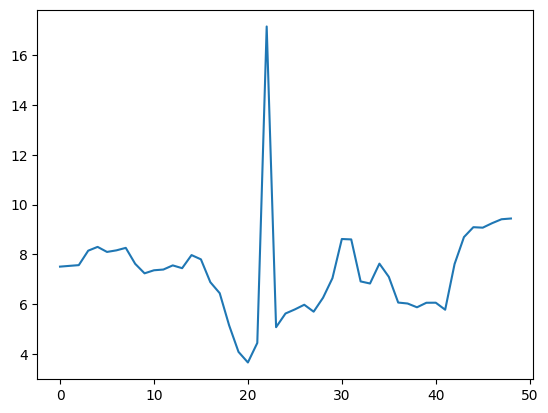

In [ ]:
plt.plot(diff)

In [ ]:
diff = [[diff.index(i), i] for i in diff]

In [ ]:
diff

[[0, 7.507686631944445],
 [1, 7.5382682291666665],
 [2, 7.567842881944444],
 [3, 8.147973090277778],
 [4, 8.300364583333334],
 [5, 8.097703993055555],
 [6, 8.160807291666666],
 [7, 8.260998263888888],
 [8, 7.621302083333333],
 [9, 7.238563368055556],
 [10, 7.361323784722222],
 [11, 7.390902777777778],
 [12, 7.5574739583333335],
 [13, 7.445234375],
 [14, 7.971245659722222],
 [15, 7.7998828125],
 [16, 6.8840972222222225],
 [17, 6.4413064236111115],
 [18, 5.152712673611111],
 [19, 4.086332465277778],
 [20, 3.660455729166667],
 [21, 4.444704861111111],
 [22, 17.14728298611111],
 [23, 5.076427951388889],
 [24, 5.625533854166667],
 [25, 5.790802951388889],
 [26, 5.977547743055555],
 [27, 5.699865451388889],
 [28, 6.259383680555556],
 [29, 7.0440451388888885],
 [30, 8.61640625],
 [31, 8.600112847222222],
 [32, 6.914079861111111],
 [33, 6.8302170138888885],
 [34, 7.627604166666667],
 [35, 7.097764756944445],
 [36, 6.065677083333333],
 [37, 6.027473958333333],
 [38, 5.875620659722222],
 [39, 6.

In [ ]:
diff.sort(key=lambda i : i[1],reverse=True)

In [ ]:
top_n = 5
thresh_hold = 0.5

out = []

largest_val = diff[0][1]

for i in diff:
  if i[1] > largest_val*thresh_hold:
    if len(out) == top_n:
      break
    out.append(i)

In [ ]:
out.sort(key=lambda i : i[0])
out

[[22, 17.14728298611111],
 [44, 9.09072482638889],
 [46, 9.252274305555556],
 [47, 9.409544270833333],
 [48, 9.439379340277778]]

(720, 1280, 3)


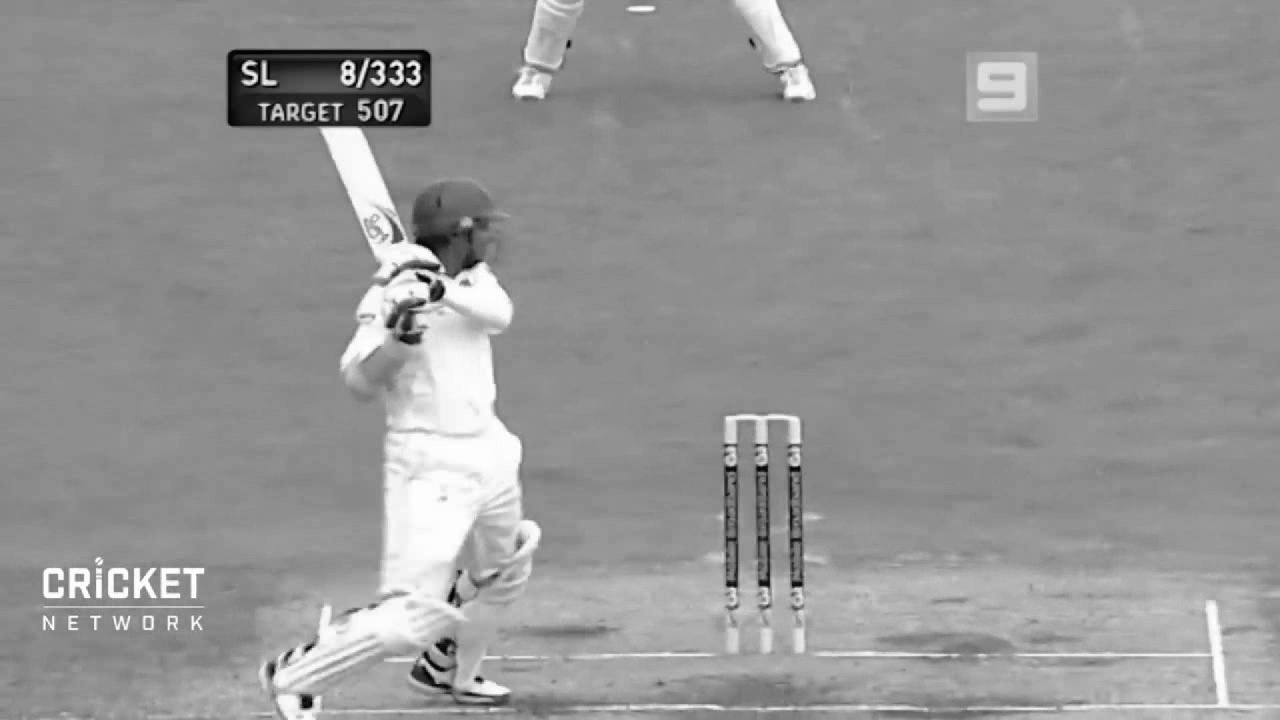

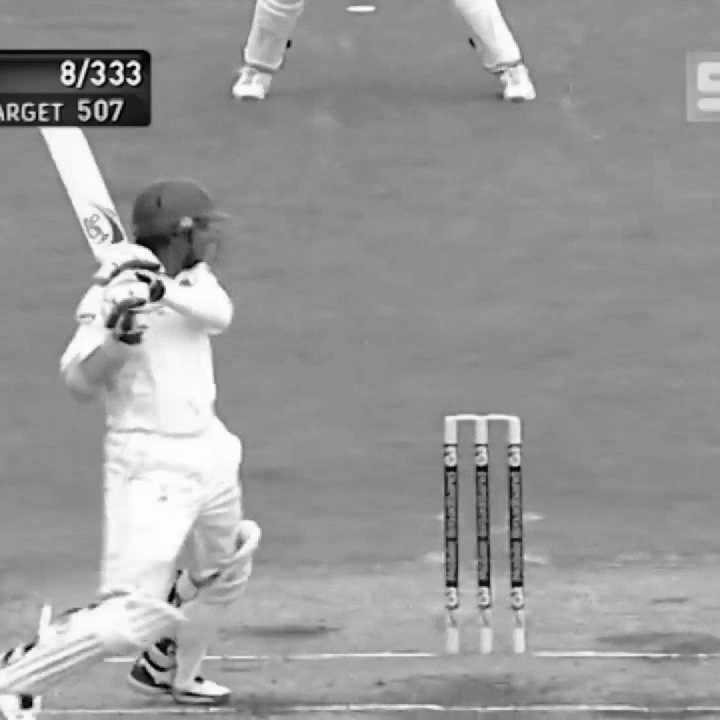

In [ ]:
# Import packages
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

img = cv2.imread('frames/frame_0019.jpg')
print(img.shape) # Print image shape
cv2_imshow(img)

# Determine the center coordinates and size of the square you want to extract
center_x = img.shape[1] // 2
center_y = img.shape[0] // 2
size = min(img.shape[0], img.shape[1]) // 2

# Calculate the coordinates for cropping
x1 = center_x - size
x2 = center_x + size
y1 = center_y - size
y2 = center_y + size

# Crop the center part
cropped_image = img[y1:y2, x1:x2]

# Display the cropped image
cv2_imshow(cropped_image)

# Save the cropped image
cv2.imwrite("Cropped Image.jpg", cropped_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
import os

# Load the frame (replace 'frame_path' with your frame's path)
frame = cv2.imread("frames/frame_0012.jpg")

# Apply GrabCut for image segmentation
mask = np.zeros(frame.shape[:2], np.uint8)
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

rect = (10, 10, frame.shape[1] - 10, frame.shape[0] - 10)
cv2.grabCut(frame, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# Create a mask where the player is marked as 'definite'
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Apply the mask to the frame to separate the player
result = frame * mask2[:, :, np.newaxis]

# Save the processed frame
output_path = 'processed_frames'
os.makedirs(output_path, exist_ok=True)
processed_frame_path = os.path.join(output_path, 'processed_frame.jpg')
cv2.imwrite(processed_frame_path, result)



In [ ]:
import os

# Get the file size of the original frame in bytes
original_frame_size_bytes = os.path.getsize('frames/frame_0019.jpg')

# Convert the size to kilobytes (KB)
original_frame_size_kb = original_frame_size_bytes / 1024

# Get the file size of the processed frame in bytes
processed_frame_size_bytes = os.path.getsize('Cropped Image.jpg')

# Convert the size to kilobytes (KB)
processed_frame_size_kb = processed_frame_size_bytes / 1024

# Compare the sizes in KB
if original_frame_size_kb == processed_frame_size_kb:
    print("Both frames have the same size in KB.")
    print(f"Size of original frame: {original_frame_size_kb} KB")
    print(f"Size of processed frame: {processed_frame_size_kb} KB")
else:
    print("The frames have different sizes in KB.")
    print(f"Size of original frame: {original_frame_size_kb} KB")
    print(f"Size of processed frame: {processed_frame_size_kb} KB")

The frames have different sizes in KB.
Size of original frame: 119.0146484375 KB
Size of processed frame: 80.0166015625 KB


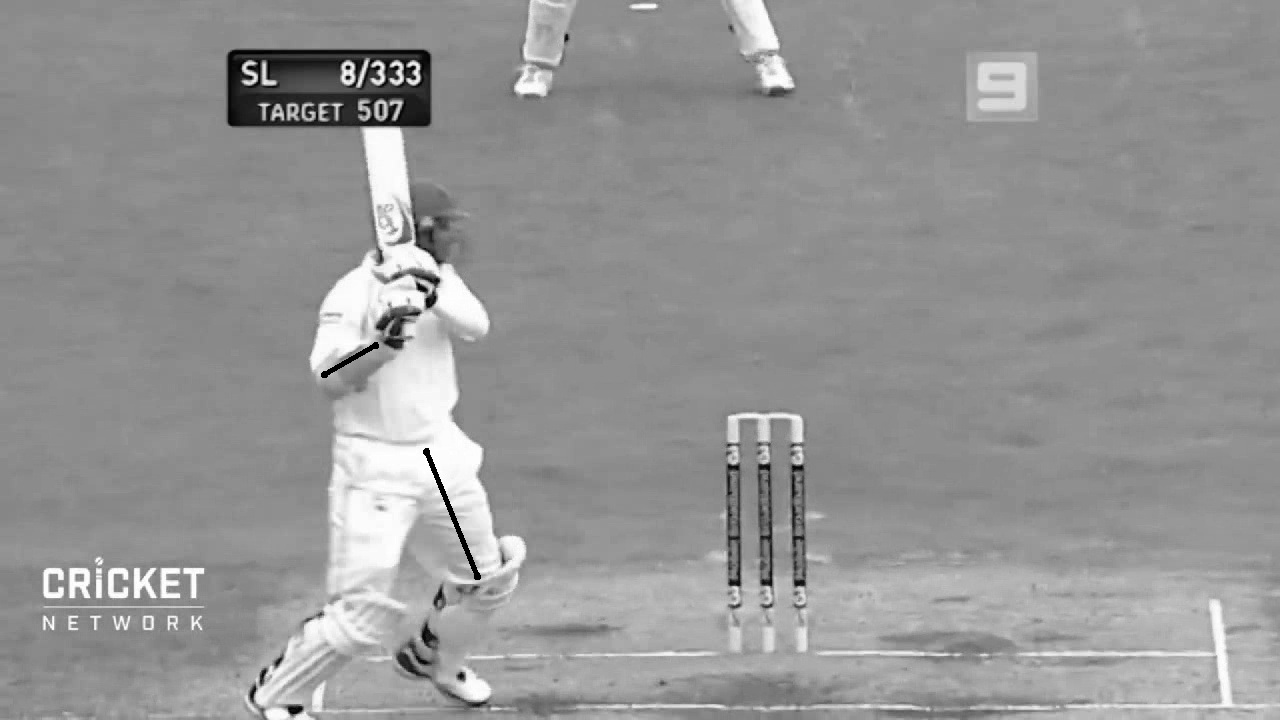

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow



BODY_PARTS = { "Nose": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
               "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
               "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "REye": 14,
               "LEye": 15, "REar": 16, "LEar": 17, "Background": 18 }

POSE_PAIRS = [ ["Neck", "RShoulder"], ["Neck", "LShoulder"], ["RShoulder", "RElbow"],
               ["RElbow", "RWrist"], ["LShoulder", "LElbow"], ["LElbow", "LWrist"],
               ["Neck", "RHip"], ["RHip", "RKnee"], ["RKnee", "RAnkle"], ["Neck", "LHip"],
               ["LHip", "LKnee"], ["LKnee", "LAnkle"], ["Neck", "Nose"], ["Nose", "REye"],
               ["REye", "REar"], ["Nose", "LEye"], ["LEye", "LEar"] ]


image_width=600
image_height=600


net = cv.dnn.readNetFromTensorflow("graph_opt.pb")

threshold=0.2

img = cv.imread('frames2/frame_0022.jpg',cv.IMREAD_UNCHANGED)
img_bgr = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
photo_height=img.shape[0]
photo_width=img.shape[1]
net.setInput(cv.dnn.blobFromImage(img_bgr, 1.0, (image_width, image_height), (127.5, 127.5, 127.5), swapRB=True, crop=False))

out = net.forward()
out = out[:, :19, :, :]

assert(len(BODY_PARTS) == out.shape[1])

points = []
for i in range(len(BODY_PARTS)):
        # Slice heatmap of corresponging body's part.
    heatMap = out[0, i, :, :]

        # Originally, we try to find all the local maximums. To simplify a sample
        # we just find a global one. However only a single pose at the same time
        # could be detected this way.
    _, conf, _, point = cv.minMaxLoc(heatMap)
    x = (photo_width * point[0]) / out.shape[3]
    y = (photo_height * point[1]) / out.shape[2]
    # Add a point if it's confidence is higher than threshold.
    points.append((int(x), int(y)) if conf > threshold else None)


for pair in POSE_PAIRS:
    partFrom = pair[0]
    partTo = pair[1]
    assert(partFrom in BODY_PARTS)
    assert(partTo in BODY_PARTS)

    idFrom = BODY_PARTS[partFrom]
    idTo = BODY_PARTS[partTo]

    if points[idFrom] and points[idTo]:
        cv.line(img, points[idFrom], points[idTo], (0, 255, 0), 3)
        cv.ellipse(img, points[idFrom], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)
        cv.ellipse(img, points[idTo], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)

t, _ = net.getPerfProfile()

cv2_imshow(img)

#waits for user to press any key
#(this is necessary to avoid Python kernel form crashing)
cv.waitKey(0)

#closing all open windows
cv.destroyAllWindows()